In [1]:
import pickle
import matplotlib.colors
import numpy as np
import pandas as pd
import xarray as xr
import xroms
import matplotlib.pyplot as plt
from wavespectra import read_ww3, read_swan, read_ndbc, read_netcdf
from wavespectra.input.swan import read_swans

In [2]:
# This runs the file with the new ndbc buoy input
%run -i /vortexfs1/home/csherwood/src/wavespectra/wavespectra/input/ndbc.py

In [3]:
# xr.show_versions()

In [5]:
# Try reading local file with xarray
fn = '/vortexfs1/home/csherwood/proj/NOPP/testwavedata/42003w2018.nc'
ds = xr.open_dataset(fn)
# Check to see if arrays have values...
print(ds.time[0].values,' to ',ds.time[-1].values)
print( np.sum(np.isfinite(ds['spectral_wave_density'].values)) )
print( np.sum(np.isfinite(ds['mean_wave_dir'].values)) )
print( np.sum(np.isfinite(ds['principal_wave_dir'].values)) )
print( np.sum(np.isfinite(ds['wave_spectrum_r1'].values)) )
print( np.sum(np.isfinite(ds['wave_spectrum_r2'].values)) )
ds

2018-02-25T20:00:00.000000000  to  2018-12-31T23:00:00.000000000
345027
0
0
0
0


<xarray.Dataset>
Dimensions:                (time: 7341, frequency: 47, latitude: 1, longitude: 1)
Coordinates:
  * time                   (time) datetime64[ns] 2018-02-25T20:00:00 ... 2018...
  * frequency              (frequency) float32 0.02 0.0325 ... 0.465 0.485
  * latitude               (latitude) float32 25.92
  * longitude              (longitude) float32 -85.61
Data variables:
    spectral_wave_density  (time, frequency, latitude, longitude) float32 0.0...
    mean_wave_dir          (time, frequency, latitude, longitude) float64 nan...
    principal_wave_dir     (time, frequency, latitude, longitude) float64 nan...
    wave_spectrum_r1       (time, frequency, latitude, longitude) float32 nan...
    wave_spectrum_r2       (time, frequency, latitude, longitude) float32 nan...
Attributes:
    institution:  NOAA National Data Buoy Center and Participators in Data As...
    url:          http://dods.ndbc.noaa.gov
    quality:      Automated QC checks with manual editing and comprehensive m...
    conventions:  COARDS
    station:      42003
    comment:      East GULF - 208 NM West of Naples, FL
    location:     25.925 N 85.615 W

### Specify sources of model and buoy data

In [6]:
ww3_file =  '/vortexfs1/scratch/jwarner/Michael/michael23/ww3.201810_spec.nc'

swan_files = ['/vortexfs1/scratch/jwarner/Michael/michael20/n42003.spc2d',
              '/vortexfs1/scratch/jwarner/Michael/michael20/n42039.spc2d',
              '/vortexfs1/scratch/jwarner/Michael/michael20/n42097.spc2d',
              '/vortexfs1/scratch/jwarner/Michael/michael20/n42098.spc2d']

buoys = ['42003','42039','42097','42098']
byr = '2018'
buoy = buoys[3]

### Example of reading buoy direc. spec. `.nc` files using xarray  

In [7]:
# Try reading a version from dods
try:
    # opening a specific year (not all data is split up by year)
    url ='https://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/' + str(buoy) + '/' + str(buoy) + 'w' + byr + '.nc'
    print(url)
    ds = xr.open_dataset(url)
except:
    # open file with all years
    url ='https://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/' + str(buoy) + '/' + str(buoy) + 'w9999' + '.nc'
    print(url)
    ds = xr.open_dataset(url)

print(ds.time[0].values,' to ',ds.time[-1].values)
print( np.sum(np.isfinite(ds['spectral_wave_density'].values)) )
print( np.sum(np.isfinite(ds['mean_wave_dir'].values)) )
print( np.sum(np.isfinite(ds['principal_wave_dir'].values)) )
print( np.sum(np.isfinite(ds['wave_spectrum_r1'].values)) )
print( np.sum(np.isfinite(ds['wave_spectrum_r2'].values)) )
ds

https://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/42098/42098w2018.nc
https://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/42098/42098w9999.nc
2015-06-09T11:00:00.000000000  to  2023-01-13T18:00:00.000000000
3934464
3659712
3659712
3659616
3659710


<xarray.Dataset>
Dimensions:                (time: 61476, frequency: 64, latitude: 1,
                            longitude: 1)
Coordinates:
  * time                   (time) datetime64[ns] 2015-06-09T11:00:00 ... 2023...
  * frequency              (frequency) float32 0.025 0.03 0.035 ... 0.57 0.58
  * latitude               (latitude) float32 27.59
  * longitude              (longitude) float32 -82.93
Data variables:
    spectral_wave_density  (time, frequency, latitude, longitude) float32 0.0...
    mean_wave_dir          (time, frequency, latitude, longitude) float64 nan...
    principal_wave_dir     (time, frequency, latitude, longitude) float64 nan...
    wave_spectrum_r1       (time, frequency, latitude, longitude) float32 nan...
    wave_spectrum_r2       (time, frequency, latitude, longitude) float32 nan...
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with daily manual QC
    conventions:                     COARDS
    station:                         42098
    comment:                         Egmont Channel Entrance, FL - 214
    location:                        27.590 N 82.931 W 
    DODS_EXTRA.Unlimited_Dimension:  time

In [9]:
dss = ds.isel(time=99)
#print(dss.time[0].values,' to ',dss.time[-1].values)
print( np.sum(np.isfinite(dss['spectral_wave_density'].values)) )
print( np.sum(np.isfinite(dss['mean_wave_dir'].values)) )
print( np.sum(np.isfinite(dss['principal_wave_dir'].values)) )
print( np.sum(np.isfinite(dss['wave_spectrum_r1'].values)) )
print( np.sum(np.isfinite(dss['wave_spectrum_r2'].values)) )
dss

64
64
64
64
64


<xarray.Dataset>
Dimensions:                (frequency: 64, latitude: 1, longitude: 1)
Coordinates:
    time                   datetime64[ns] 2015-06-13T14:00:00
  * frequency              (frequency) float32 0.025 0.03 0.035 ... 0.57 0.58
  * latitude               (latitude) float32 27.59
  * longitude              (longitude) float32 -82.93
Data variables:
    spectral_wave_density  (frequency, latitude, longitude) float32 0.0 ... 0...
    mean_wave_dir          (frequency, latitude, longitude) float64 176.0 ......
    principal_wave_dir     (frequency, latitude, longitude) float64 152.0 ......
    wave_spectrum_r1       (frequency, latitude, longitude) float32 0.35 ... ...
    wave_spectrum_r2       (frequency, latitude, longitude) float32 0.66 ... ...
Attributes:
    institution:                     NOAA National Data Buoy Center and Parti...
    url:                             http://dods.ndbc.noaa.gov
    quality:                         Automated QC checks with daily manual QC
    conventions:                     COARDS
    station:                         42098
    comment:                         Egmont Channel Entrance, FL - 214
    location:                        27.590 N 82.931 W 
    DODS_EXTRA.Unlimited_Dimension:  time

In [10]:
# grab the data as arrays
swden = np.squeeze( dss['spectral_wave_density'].values)
swdir1 = np.squeeze(dss['mean_wave_dir'].values)
swdir2 = np.squeeze( dss['principal_wave_dir'].values)
r1 = np.squeeze( dss['wave_spectrum_r1'].values)
r2 = np.squeeze( dss['wave_spectrum_r2'].values)
print(swden)
print(r1)

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.009 0.044 0.085 0.088 0.085 0.098 0.142 0.158
 0.316 0.224 0.212 0.307 0.31  0.221 0.18  0.196 0.209 0.13  0.104 0.133
 0.123 0.142 0.066 0.088 0.107 0.066 0.082 0.051 0.057 0.057 0.047 0.054
 0.041 0.044 0.032 0.022 0.022 0.019 0.028 0.019 0.025 0.025 0.022 0.022
 0.019 0.016 0.016 0.016]
[0.35 0.27 0.49 0.65 0.16 0.64 0.43 0.16 0.33 0.44 0.6  0.65 0.46 0.43
 0.05 0.4  0.58 0.81 0.9  0.9  0.89 0.84 0.9  0.9  0.95 0.93 0.94 0.97
 0.95 0.92 0.92 0.93 0.94 0.92 0.85 0.9  0.91 0.9  0.8  0.84 0.88 0.77
 0.85 0.86 0.8  0.85 0.8  0.83 0.75 0.8  0.75 0.72 0.67 0.7  0.81 0.78
 0.78 0.77 0.75 0.74 0.72 0.69 0.75 0.69]


### Open same file with `read_ndbc`

In [12]:
url = 'https://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/42098/42098w9999.nc'
ds2 = read_ndbc(url, chunks={}, always_2d=True)
ds2

<xarray.Dataset>
Dimensions:  (time: 61476, freq: 64, lat: 1, lon: 1, dir: 36)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-09T11:00:00 ... 2023-01-13T18:00:00
  * freq     (freq) float32 0.025 0.03 0.035 0.04 0.045 ... 0.55 0.56 0.57 0.58
  * lat      (lat) float32 27.59
  * lon      (lon) float32 -82.93
  * dir      (dir) float64 0.0 10.0 20.0 30.0 40.0 ... 320.0 330.0 340.0 350.0
Data variables:
    efth     (time, lat, lon, freq, dir) float64 dask.array<chunksize=(61476, 1, 1, 64, 36), meta=np.ndarray>

(61476, 1, 1)
57183


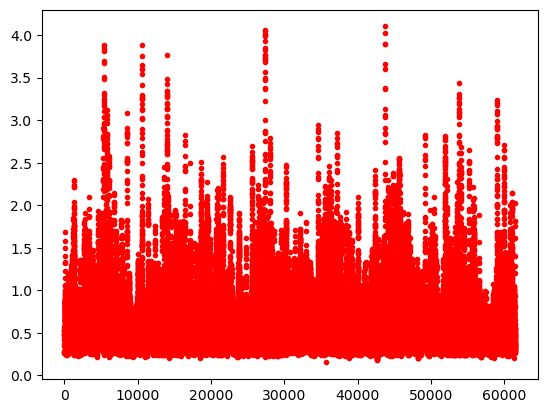

In [13]:
hs = ds2.efth.spec.hs().values
print(np.shape(hs))
print(np.sum(np.isfinite(hs)))
plt.plot(np.squeeze(hs),'.r')

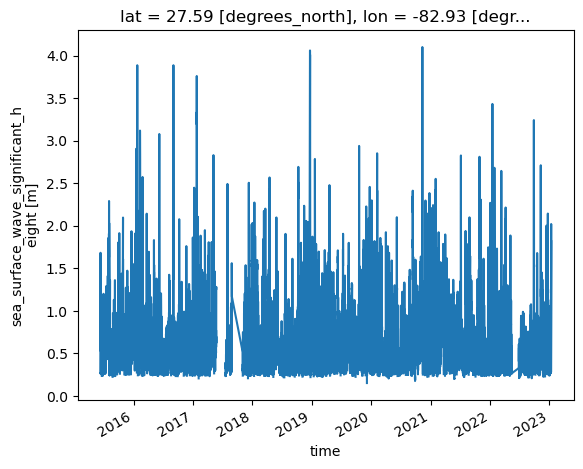

In [14]:
hs = ds2.efth.spec.hs()
hs.plot()

(61476, 1, 1)
57183


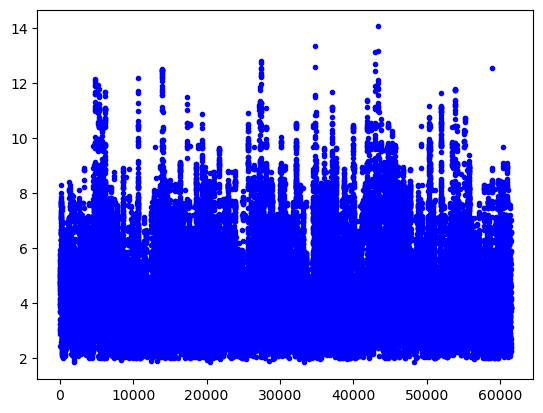

In [15]:
tp = ds2.efth.spec.tp().values
print(np.shape(tp))
print(np.sum(np.isfinite(tp)))
plt.plot(np.squeeze(tp),'.b')

### Define some functions

In [16]:
# These are from Isabel Houghton's example
def integrate_in_frequency(data_field, frequencies):
    return np.trapz(data_field, frequencies, axis=0).squeeze()

def integrate_in_direction(data_field, directional_bin_width):
    return np.sum(data_field * directional_bin_width, axis=1).squeeze()

### Read the WW3 files using wavespectra `read_ww3`  

In [17]:
ds_ww3 = read_ww3( ww3_file )
time_ini_ww3 = ds_ww3.time.values[0]
time_end_ww3 = ds_ww3.time.values[-1]
print(time_ini_ww3, time_end_ww3)
ds_ww3

2018-10-07T12:00:00.000000000 2018-10-12T00:00:00.000000000


/vortexfs1/home/csherwood/mambaforge/envs/NOPP/lib/python3.9/site-packages/wavespectra/input/ww3.py:63: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  dset = dset.rename(MAPPING)


<xarray.Dataset>
Dimensions:   (time: 109, site: 5, string40: 40, freq: 25, dir: 24)
Coordinates:
  * time      (time) datetime64[ns] 2018-10-07T12:00:00 ... 2018-10-12
  * site      (site) float64 1.0 2.0 3.0 4.0 5.0
  * string40  (string40) float64 nan nan nan nan nan nan ... nan nan nan nan nan
  * freq      (freq) float32 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
  * dir       (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
Data variables:
    lon       (site) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    lat       (site) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    efth      (time, site, freq, dir) float32 dask.array<chunksize=(109, 5, 25, 24), meta=np.ndarray>
    dpt       (time, site) float32 dask.array<chunksize=(109, 5), meta=np.ndarray>
    wspd      (time, site) float32 dask.array<chunksize=(109, 5), meta=np.ndarray>
    wdir      (time, site) float32 dask.array<chunksize=(109, 5), meta=np.ndarray>
Attributes: (12/16)
    product_name:           ww3.201810_spec.nc
    area:                   H Michael
    data_type:              OCO spectra 2D
    format_version:         1.1
    southernmost_latitude:  n/a
    northernmost_latitude:  n/a
    ...                     ...
    minimum_altitude:       n/a
    maximum_altitude:       n/a
    altitude_resolution:    n/a
    start_date:             2018-10-07 12:00:00
    stop_date:              2018-10-12 00:00:00
    field_type:             hourly

In [18]:
### Pull one time for comparison, and convert to 
ds = ds_ww3.isel(time=0, site=1)
spectrum = ds['efth'].values
frequencies = ds['freq'].values
directions = ds['dir'].values
direction_radians = np.deg2rad(directions)
directional_bin_width = 15.
print(np.shape(spectrum), np.shape(frequencies), np.shape(directions))

# The wave spectra is 25 frequencies (dim 0) x 24 directions (dim 1)
energy_density_spectrum = integrate_in_direction(spectrum, directional_bin_width)

# each directional coefficient (a1, b1..) is a Fourier coefficient of the 2D WW3 spectrum,
# normalized by the 1D (directionally-integrated) energy density spectrum
# a1 = integrate_in_direction(spectrum * np.cos(direction_radians),
#                             directional_bin_width=directional_bin_width) / energy_density_spectrum

# a2 = integrate_in_direction(spectrum * np.cos(2 * direction_radians),
#                             directional_bin_width=directional_bin_width) / energy_density_spectrum

# b1 = integrate_in_direction(spectrum * np.sin(direction_radians),
#                             directional_bin_width=directional_bin_width) / energy_density_spectrum

# b2 = integrate_in_direction(spectrum * np.sin(2 * direction_radians),
#                             directional_bin_width=directional_bin_width) / energy_density_spectrum

# recalculate w/ normalizing
a1 = integrate_in_direction(spectrum * np.cos(direction_radians),
                            directional_bin_width=directional_bin_width) 

a2 = integrate_in_direction(spectrum * np.cos(2 * direction_radians),
                            directional_bin_width=directional_bin_width) 

b1 = integrate_in_direction(spectrum * np.sin(direction_radians),
                            directional_bin_width=directional_bin_width) 

b2 = integrate_in_direction(spectrum * np.sin(2 * direction_radians),
                            directional_bin_width=directional_bin_width) 
# some quick calculations of bulk statistics
m0 = np.trapz(energy_density_spectrum, frequencies)
m1 = np.trapz(energy_density_spectrum * frequencies, frequencies)

# TODO - Get rid of divide by zeros when efth is zero
print(np.shape(a1))
print(np.shape(energy_density_spectrum))
ok = np.argwhere(np.isfinite(a1+b1+a2+b2))
integrated_a1 = np.trapz(a1[ok] * energy_density_spectrum[ok], frequencies[ok]) / m0
integrated_b1 = np.trapz(b1[ok] * energy_density_spectrum[ok], frequencies[ok]) / m0
print(integrated_a1)

model_hs = 4 * np.sqrt(m0)
model_dm = np.arctan2(integrated_b1, integrated_a1) * 180 / np.pi
model_tm = m0 / m1
print(f"H_s model: {model_hs:.2f} m")
print(f"T_m model: {model_tm:.2f} s")
#print(f"D_m model: {model_dm:.2f} deg")
# print(f"H_s model: {model_hs:.2f} m, obs: {observation_hs:.2f} m")
# print(f"T_m model: {model_tm:.2f} s, obs: {observation_tm:.2f} s")
# print(f"D_m model: {model_dm:.2f} deg, obs: {observation_dm:.2f} deg")

(25, 24) (25,) (24,)
(25,)
(25,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
H_s model: 0.50 m
T_m model: 9.99 s


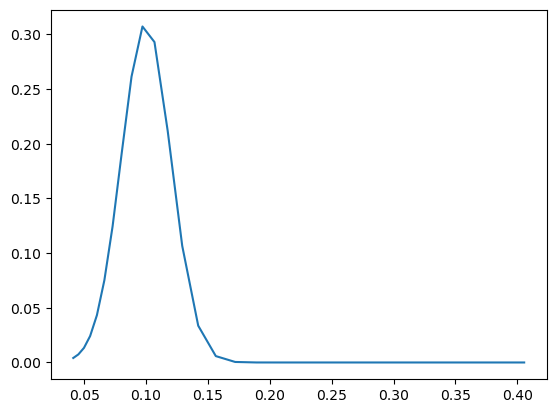

In [19]:
plt.plot(frequencies,energy_density_spectrum)

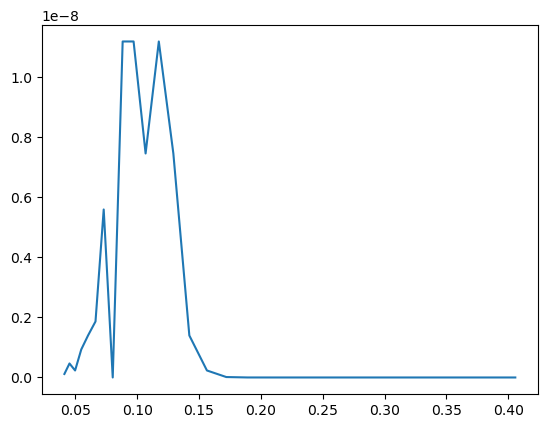

In [20]:
plt.plot(frequencies,a1)

### Demo use of wavespectra `read_swans` method

In [27]:
# load lots of SWAN files
dset_swans = read_swans(swan_files)
dset_swans

<xarray.Dataset>
Dimensions:  (time: 109, site: 4, freq: 31, dir: 60)
Coordinates:
  * time     (time) datetime64[ns] 2018-10-07T12:00:00 ... 2018-10-12
  * site     (site) <U6 'n42003' 'n42039' 'n42097' 'n42098'
  * freq     (freq) float64 0.04118 0.0453 0.04983 ... 0.5939 0.6532 0.7186
  * dir      (dir) float64 3.0 9.0 15.0 21.0 27.0 ... 339.0 345.0 351.0 357.0
Data variables:
    efth     (time, site, freq, dir) float64 0.0 0.0 0.0 ... 3.393e-06 2.025e-06
    lat      (site) float64 25.92 27.79 25.7 27.59
    lon      (site) float64 -85.62 -86.01 -83.65 -82.93

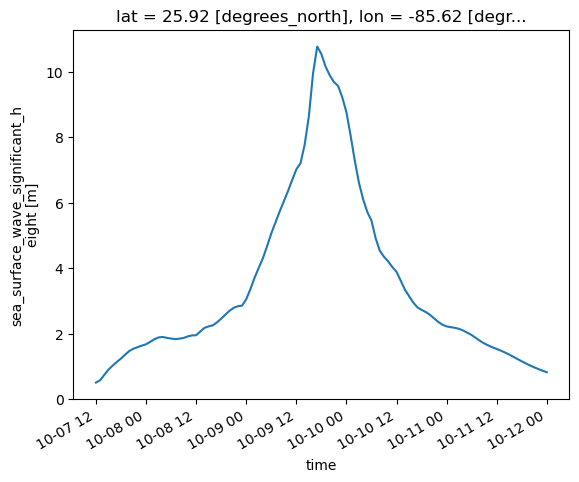

In [30]:
# And calculate Hs
hs_swan = dset_swan.spec.hs()
#plt.plot(np.squeeze(hs_swan))
hs_swan.plot()

### Demo using wavespec `read_ww3` to read time series from multiple sites

In [32]:
dsetww3 = read_ww3( ww3_file )
dsetww3

/vortexfs1/home/csherwood/mambaforge/envs/NOPP/lib/python3.9/site-packages/wavespectra/input/ww3.py:63: UserWarning: rename 'time' to 'time' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  dset = dset.rename(MAPPING)


<xarray.Dataset>
Dimensions:   (time: 109, site: 5, string40: 40, freq: 25, dir: 24)
Coordinates:
  * time      (time) datetime64[ns] 2018-10-07T12:00:00 ... 2018-10-12
  * site      (site) float64 1.0 2.0 3.0 4.0 5.0
  * string40  (string40) float64 nan nan nan nan nan nan ... nan nan nan nan nan
  * freq      (freq) float32 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
  * dir       (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
Data variables:
    lon       (site) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    lat       (site) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    efth      (time, site, freq, dir) float32 dask.array<chunksize=(109, 5, 25, 24), meta=np.ndarray>
    dpt       (time, site) float32 dask.array<chunksize=(109, 5), meta=np.ndarray>
    wspd      (time, site) float32 dask.array<chunksize=(109, 5), meta=np.ndarray>
    wdir      (time, site) float32 dask.array<chunksize=(109, 5), meta=np.ndarray>
Attributes: (12/16)
    product_name:           ww3.201810_spec.nc
    area:                   H Michael
    data_type:              OCO spectra 2D
    format_version:         1.1
    southernmost_latitude:  n/a
    northernmost_latitude:  n/a
    ...                     ...
    minimum_altitude:       n/a
    maximum_altitude:       n/a
    altitude_resolution:    n/a
    start_date:             2018-10-07 12:00:00
    stop_date:              2018-10-12 00:00:00
    field_type:             hourly

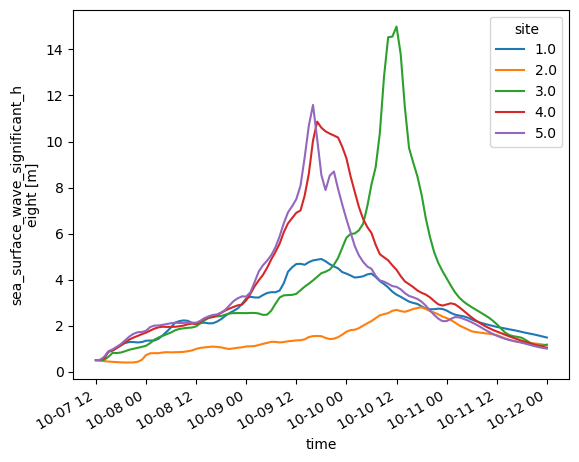

In [33]:
hs = dsetww3.efth.spec.hs()
# or hs = dset.spec.hs()
hs.plot.line(x='time')